In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = h5py.File("data/train_catvnoncat.h5", "r")
test_data = h5py.File("data/test_catvnoncat.h5", "r")

In [3]:
print(train_data.keys())
print(test_data.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [4]:
def load_data():
    x_train = np.empty(train_data["train_set_x"].shape)
    y_train = np.empty(train_data["train_set_y"].shape)
    x_test = np.empty(test_data["test_set_x"].shape)
    y_test = np.empty(test_data["test_set_y"].shape)

    train_data["train_set_x"].read_direct(x_train)
    train_data["train_set_y"].read_direct(y_train)
    test_data["test_set_x"].read_direct(x_test)
    test_data["test_set_y"].read_direct(y_test)

    return (x_train, y_train, x_test, y_test)

In [5]:
x_train, y_train, x_test, y_test = load_data()

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print(" x_test:", x_test.shape)
print(" y_test:", y_test.shape)

x_train: (209, 64, 64, 3)
y_train: (209,)
 x_test: (50, 64, 64, 3)
 y_test: (50,)


Currently, each input sample is an array of shape **64 x 64 x 3**. So we will flatten every sample. After this, `x_train` & `x_test` become matrices where each row is a sample vector.

Shape of `x_train` & `x_test` = `(m, nx)`

nx = number of features <br>
m = number of samples

After preprocessing, <br>
inputs' shape = `(m, nx)`, labels' shape = `(1, m)`

In [6]:
x_train = x_train.reshape(-1, 64 * 64 * 3) / 255.0
y_train = y_train.reshape(1, -1)
x_test = x_test.reshape(-1, 64 * 64 * 3) / 255.0
y_test = y_test.reshape(1, -1)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print(" x_test:", x_test.shape)
print(" y_test:", y_test.shape)

x_train: (209, 12288)
y_train: (1, 209)
 x_test: (50, 12288)
 y_test: (1, 50)


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def forward(w, b, x):
    y_pred = sigmoid(np.dot(w, x.T) + b)  # shape: (1, m)
    return y_pred

In [9]:
def backprop(x, y, y_pred):
    m = x.shape[0]  # number of samples

    cost = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m  # scalar

    dz = y_pred - y  # shape: (1, m), a row vector where each value is dL/dz
    dw = np.dot(dz, x) / m  # shape: (1, nx)
    db = np.sum(dz) / m  # scalar

    gradients = {"dw": dw, "db": db}
    return (gradients, cost)

In [10]:
def optimize(w, b, x, y, epochs, lr=0.001, print_cost=False):
    costs = []
    for i in range(epochs):
        y_pred = forward(w, b, x)
        grads, cost = backprop(x, y, y_pred)

        dw = grads["dw"]
        db = grads["db"]

        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print(f"Epoch {i:<4d}, Cost = {cost:.3f}")

    return costs

In [11]:
nx = x_train.shape[1]  # number of features
w = np.zeros((1, nx))  # a row vector of weights for our neuron
b = np.array(0.0)

costs = optimize(w, b, x_train, y_train, epochs=2500, lr=0.001, print_cost=True)

Epoch 0   , Cost = 0.693
Epoch 100 , Cost = 0.591
Epoch 200 , Cost = 0.556
Epoch 300 , Cost = 0.529
Epoch 400 , Cost = 0.507
Epoch 500 , Cost = 0.488
Epoch 600 , Cost = 0.471
Epoch 700 , Cost = 0.456
Epoch 800 , Cost = 0.442
Epoch 900 , Cost = 0.430
Epoch 1000, Cost = 0.418
Epoch 1100, Cost = 0.407
Epoch 1200, Cost = 0.397
Epoch 1300, Cost = 0.388
Epoch 1400, Cost = 0.379
Epoch 1500, Cost = 0.370
Epoch 1600, Cost = 0.363
Epoch 1700, Cost = 0.355
Epoch 1800, Cost = 0.348
Epoch 1900, Cost = 0.341
Epoch 2000, Cost = 0.334
Epoch 2100, Cost = 0.328
Epoch 2200, Cost = 0.322
Epoch 2300, Cost = 0.316
Epoch 2400, Cost = 0.311


In [12]:
def binary_accuracy(y_pred, y):
    return np.mean((y_pred > 0.5) == y)

In [13]:
pred_train = forward(w, b, x_train)
pred_test = forward(w, b, x_test)

print(f"Training accuracy: {binary_accuracy(pred_train, y_train):.2f}")
print(f"Test accuracy: {binary_accuracy(pred_test, y_test):.2f}")

Training accuracy: 0.92
Test accuracy: 0.74


In [14]:
def label(n):
    return "cat" if n > 0.5 else "non-cat"

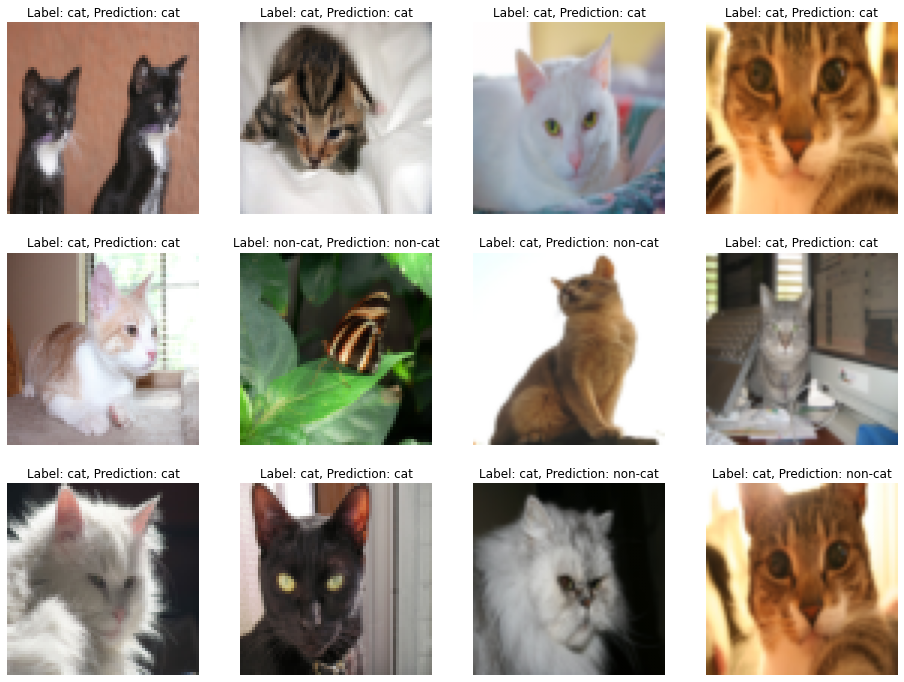

In [15]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(x_test[i].reshape(64, 64, 3))
    plt.axis("off")
    plt.title(f"Label: {label(y_test[0, i])}, Prediction: {label(pred_test[0, i])}")